# Voting 
#### class sklearn.ensemble.VotingClassifier(estimators, *, voting='hard', weights=None, n_jobs=None, flatten_transform=True, verbose=False)
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
X, y = make_classification(n_samples=180, n_features=13, n_informative=13, n_redundant=0, n_repeated=0, n_classes=3)

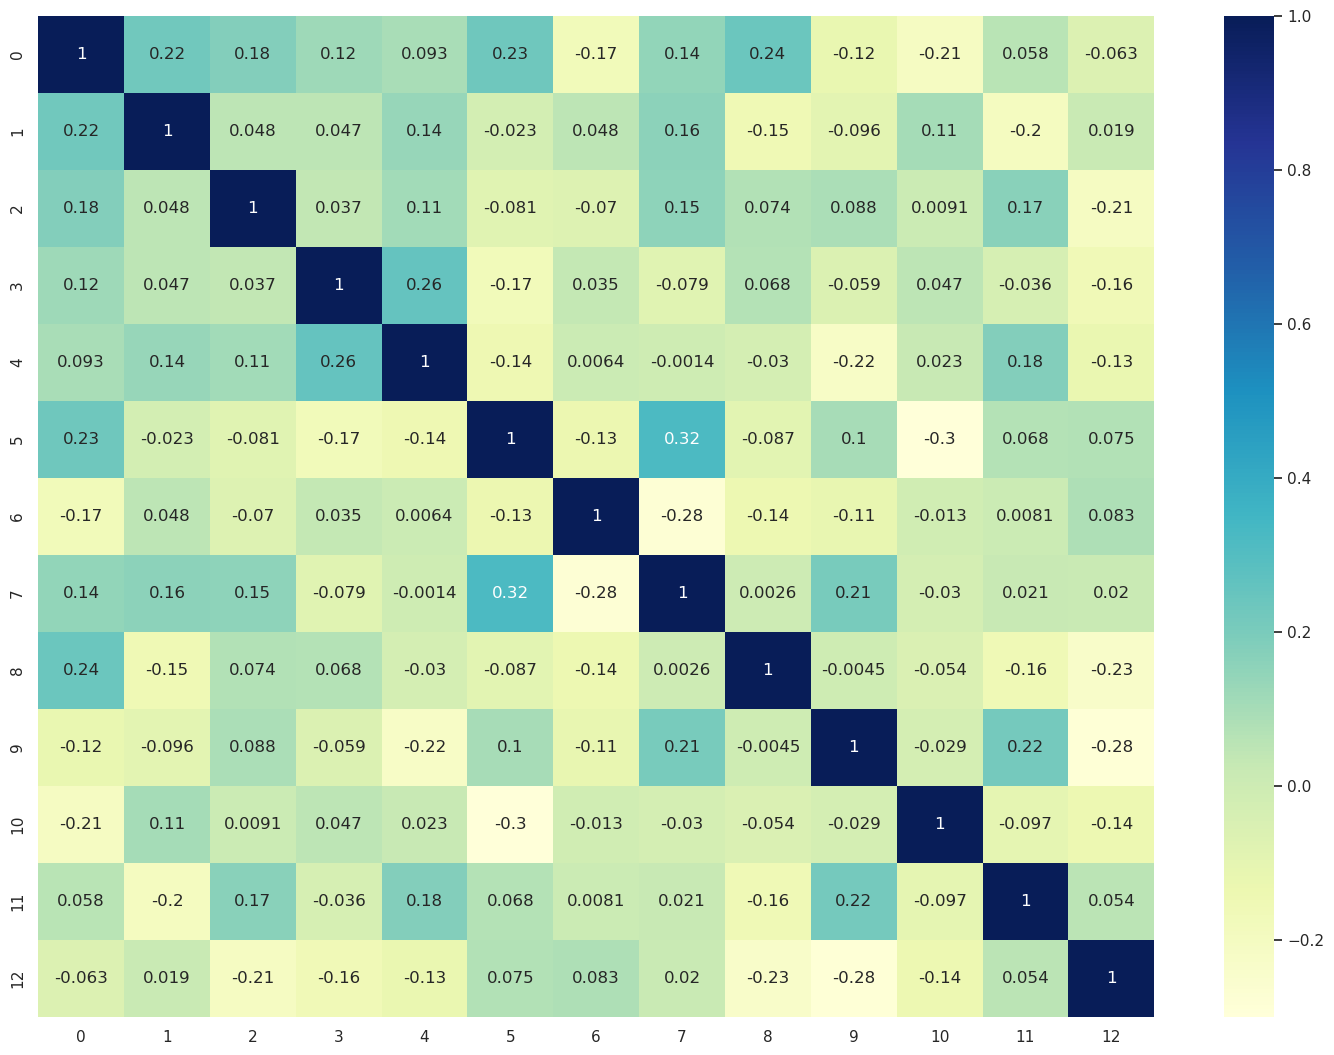

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(18,13)})
df = pd.DataFrame(X)
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True, random_state=0)

In [5]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier(max_depth=3)
clf3 = RandomForestClassifier(n_estimators=2)

In [6]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2)

In [7]:
print("clf1 train score:",clf1.score(X_train, y_train),"clf1 test score:",clf1.score(X_test, y_test))
print("clf2 train score:",clf2.score(X_train, y_train),"clf2 test score:",clf2.score(X_test, y_test))
print("clf3 train score:",clf3.score(X_train, y_train),"clf3 test score:",clf3.score(X_test, y_test))

clf1 train score: 0.8777777777777778 clf1 test score: 0.6777777777777778
clf2 train score: 0.8666666666666667 clf2 test score: 0.5555555555555556
clf3 train score: 0.7666666666666667 clf3 test score: 0.4777777777777778


### hard 

In [8]:
from sklearn.ensemble import VotingClassifier
v_clf = VotingClassifier(estimators=[('lr', clf1), ('dtc', clf2), ('rfc', clf3)], verbose=True)
v_clf.fit(X_train, y_train)

[Voting] ....................... (1 of 3) Processing lr, total=   0.0s
[Voting] ...................... (2 of 3) Processing dtc, total=   0.0s
[Voting] ...................... (3 of 3) Processing rfc, total=   0.0s


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dtc', DecisionTreeClassifier(max_depth=3)),
                             ('rfc', RandomForestClassifier(n_estimators=2))],
                 verbose=True)

In [9]:
v_clf.score(X_train, y_train), v_clf.score(X_test, y_test)

(0.9222222222222223, 0.5888888888888889)

### soft

In [10]:
clf1.predict_proba(X_test)[0], clf2.predict_proba(X_test)[0], clf3.predict_proba(X_test)[0]

(array([0.00186815, 0.01723504, 0.98089682]),
 array([0.0952381, 0.       , 0.9047619]),
 array([0. , 0.5, 0.5]))

In [11]:
s_clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], verbose=True, voting='soft')
s_clf.fit(X_train, y_train)

[Voting] ....................... (1 of 3) Processing lr, total=   0.0s
[Voting] ....................... (2 of 3) Processing rf, total=   0.0s
[Voting] ...................... (3 of 3) Processing gnb, total=   0.0s


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', DecisionTreeClassifier(max_depth=3)),
                             ('gnb', RandomForestClassifier(n_estimators=2))],
                 verbose=True, voting='soft')

In [12]:
s_clf.score(X_train, y_train), s_clf.score(X_test, y_test)

(0.9111111111111111, 0.6333333333333333)

## wine dataset ensemble

In [13]:
# load Wine dataset
from sklearn.datasets import load_wine

wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [14]:
print(wine.target_names)
print(wine.feature_names)

['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [15]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['label'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [16]:
# check for missing values
df[df.isna().any(axis=1)]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label


In [17]:
df.label.value_counts(normalize=True).round(3)

label
1    0.399
0    0.331
2    0.270
Name: proportion, dtype: float64

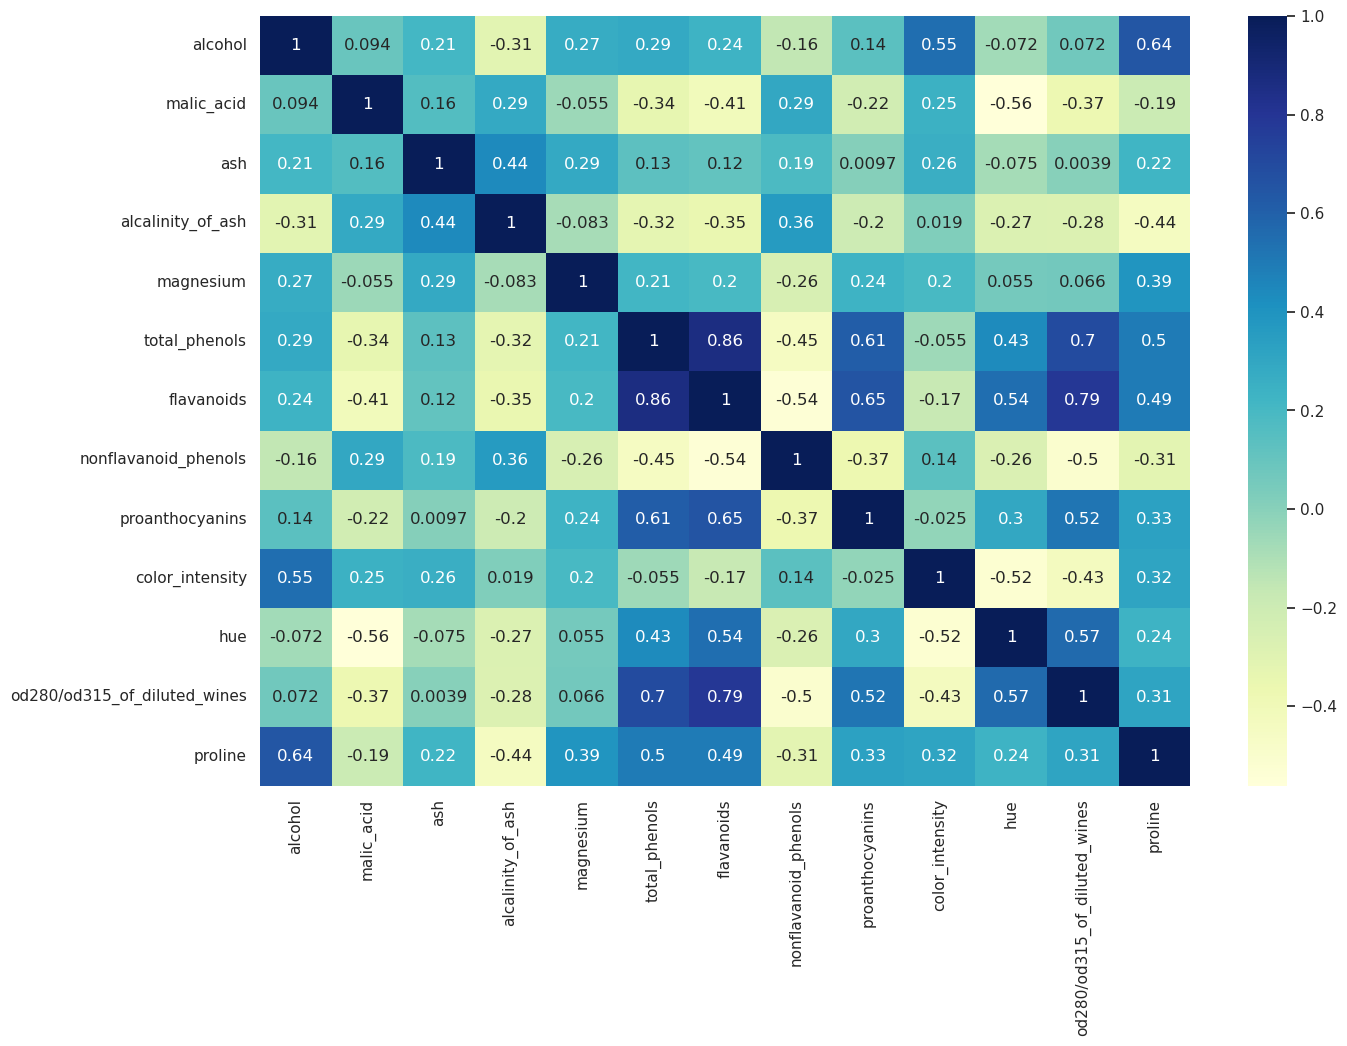

In [18]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.iloc[:,:-1].corr(), annot=True, cmap="YlGnBu")
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.5, shuffle=True, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(89, 13) (89, 13) (89,) (89,)


In [20]:
## wine dataset 
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier(max_depth=3)
clf3 = RandomForestClassifier(n_estimators=2)

In [21]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2)

In [22]:
print("clf1 train score:",clf1.score(X_train, y_train),"clf1 test score:",clf1.score(X_test, y_test))
print("clf2 train score:",clf2.score(X_train, y_train),"clf2 test score:",clf2.score(X_test, y_test))
print("clf3 train score:",clf3.score(X_train, y_train),"clf3 test score:",clf3.score(X_test, y_test))

clf1 train score: 0.9775280898876404 clf1 test score: 0.9213483146067416
clf2 train score: 1.0 clf2 test score: 0.898876404494382
clf3 train score: 0.9662921348314607 clf3 test score: 0.8426966292134831


## hard

In [23]:
v_clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], verbose=True)

In [24]:
v_clf.fit(X_train, y_train)

[Voting] ....................... (1 of 3) Processing lr, total=   0.0s
[Voting] ....................... (2 of 3) Processing rf, total=   0.0s
[Voting] ...................... (3 of 3) Processing gnb, total=   0.0s


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', DecisionTreeClassifier(max_depth=3)),
                             ('gnb', RandomForestClassifier(n_estimators=2))],
                 verbose=True)

In [25]:
v_clf.score(X_train, y_train), v_clf.score(X_test, y_test)

(1.0, 0.9213483146067416)

### soft

In [26]:
clf1.predict_proba(X_test)[0], clf2.predict_proba(X_test)[0], clf3.predict_proba(X_test)[0]

(array([9.99092382e-01, 7.87343100e-04, 1.20275365e-04]),
 array([1., 0., 0.]),
 array([1., 0., 0.]))

In [27]:
s_clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], verbose=True, voting='soft')
s_clf.fit(X_train, y_train)

[Voting] ....................... (1 of 3) Processing lr, total=   0.0s
[Voting] ....................... (2 of 3) Processing rf, total=   0.0s
[Voting] ...................... (3 of 3) Processing gnb, total=   0.0s


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', DecisionTreeClassifier(max_depth=3)),
                             ('gnb', RandomForestClassifier(n_estimators=2))],
                 verbose=True, voting='soft')

In [28]:
s_clf.score(X_train, y_train), s_clf.score(X_test, y_test)

(1.0, 0.9325842696629213)

## bagging
#### class sklearn.ensemble.BaggingClassifier(estimator=None, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [34]:
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()

In [37]:
# classifier vs their bagging version
clfs =[lr, dt, rf, et, knn]
for clf in clfs:
    clf_scores = cross_val_score(clf, X_train, y_train, cv = 10)
    bagging = BaggingClassifier(clf, max_samples=0.4, max_features=10, random_state=0)
    bagging_scores = cross_val_score(bagging, X_train, y_train, cv = 10)
    print(clf.__class__.__name__, "Score mean:", clf_scores.mean())
    print("Bagging", clf.__class__.__name__, "Score mean:", bagging_scores.mean(),"\n")

LogisticRegression Score mean: 0.9444444444444444
Bagging LogisticRegression Score mean: 0.9319444444444445 

DecisionTreeClassifier Score mean: 0.898611111111111
Bagging DecisionTreeClassifier Score mean: 0.9333333333333332 

RandomForestClassifier Score mean: 1.0
Bagging RandomForestClassifier Score mean: 0.9888888888888889 

ExtraTreesClassifier Score mean: 1.0
Bagging ExtraTreesClassifier Score mean: 0.9888888888888889 

KNeighborsClassifier Score mean: 0.7652777777777777
Bagging KNeighborsClassifier Score mean: 0.7972222222222223 



## Stacking
####  class sklearn.ensemble.StackingClassifier(estimators, final_estimator=None, *, cv=None, stack_method='auto', n_jobs=None, passthrough=False, verbose=0)
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html

In [32]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svc', SVC(random_state=42)),
]
clf_stack = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

clf_stack.fit(X_train, y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svc', SVC(random_state=42))],
                   final_estimator=LogisticRegression())

In [33]:
clf_stack.score(X_train, y_train), clf_stack.score(X_test, y_test)

(1.0, 0.9325842696629213)

### More ensemble algorithms:
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble